In [22]:
# ENSEMBLE METHODS - Average

from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
from numpy import mean
from numpy import std
import numpy as np
from numpy import array
from numpy import argmax

import pickle 

In [15]:
# fit model on dataset
def fit_model(trainX, trainy):
	trainy_enc = to_categorical(trainy)
	# define model
	model = Sequential()
	model.add(Dense(25, input_dim=2, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy_enc, epochs=500, verbose=0)
	return model

In [16]:

# make an ensemble prediction for multi-class classification
def ensemble_predictions(members, testX):
	# make predictions
	yhats = [model.predict(testX) for model in members]
	yhats = array(yhats)
	# sum across ensemble members
	summed = numpy.sum(yhats, axis=0)
	# argmax across classes
	result = argmax(summed, axis=1)
	return result
 

In [17]:
# evaluate a specific number of members in an ensemble
def evaluate_n_members(members, n_members, testX, testy):
	# select a subset of members
	subset = members[:n_members]
	# make prediction
	yhat = ensemble_predictions(subset, testX)
	# calculate accuracy
	return accuracy_score(testy, yhat)

In [ ]:
def build_freq_list(img_descriptors, model, num_words):
    freq_list = [0] * num_words
    for word in model.predict(img_descriptors):
        freq_list[word] += 1
    return freq_list

def img_descriptors_to_freq_list(data, model, num_words): 
    processed_image = []
    for img_descriptors in data:
        if (img_descriptors is not None):
            freq_list = build_freq_list(img_descriptors, model, num_words)
            processed_image.append(freq_list)
    return processed_image

In [ ]:
joblib.load('data/models/final_1200words_kmeans.joblib')

In [18]:
# generate 2d classification dataset
X, y = make_blobs(n_samples=1100, centers=3, n_features=2, cluster_std=2, random_state=2)
# split into train and test
n_train = 100
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape, testX.shape)
# fit all models
n_members = 10
members = [fit_model(trainX, trainy) for _ in range(n_members)]
# evaluate different numbers of ensembles on hold out set
single_scores, ensemble_scores = list(), list()
for i in range(1, len(members)+1):
	# evaluate model with i members
	ensemble_score = evaluate_n_members(members, i, testX, testy)
	# evaluate the i'th model standalone
	testy_enc = to_categorical(testy)
	_, single_score = members[i-1].evaluate(testX, testy_enc, verbose=0)
	# summarize this step
	print('> %d: single=%.3f, ensemble=%.3f' % (i, single_score, ensemble_score))
	ensemble_scores.append(ensemble_score)
	single_scores.append(single_score)
# summarize average accuracy of a single final model
print('Accuracy %.3f (%.3f)' % (mean(single_scores), std(single_scores)))

(100, 2) (1000, 2)
> 1: single=0.807, ensemble=0.807
> 2: single=0.813, ensemble=0.813
> 3: single=0.810, ensemble=0.811
> 4: single=0.813, ensemble=0.812
> 5: single=0.813, ensemble=0.813
> 6: single=0.813, ensemble=0.814
> 7: single=0.812, ensemble=0.813
> 8: single=0.804, ensemble=0.811
> 9: single=0.804, ensemble=0.810
> 10: single=0.806, ensemble=0.809
Accuracy 0.810 (0.004)


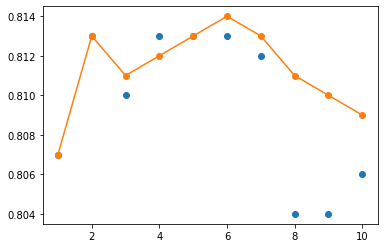

In [20]:
# plot score vs number of ensemble members
x_axis = [i for i in range(1, len(members)+1)]
pyplot.plot(x_axis, single_scores, marker='o', linestyle='None')
pyplot.plot(x_axis, ensemble_scores, marker='o')
pyplot.show()

In [2]:
## SECOND OPTION
import numpy as np
import pandas as pd
import os
import fastai
from fastai.vision import *
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
# import pydicom
import torchvision.models as models
from tqdm import tqdm
import numpy as np

In [4]:
models = ["/gitcode/trash-sort/data/models/cnn_res50_model.pth", "cnn_res18_model","entropy_1000_tree_rand_forest","entropy_dec_tree",  "tenpercent_1200words_imbalanced_knn_5","tenpercent_1200words_imbalanced_nb" ]
file_path = 'data/models'
ensemble = 'data/models/models_for_ensemble'
for m in models:
    with open(m, 'rb') as f:
        resnet50_prediction = pickle.loads(m).predict(img)
        resnet18_predicition = pickle.load("cnn_res18_model").predict(img)
    #     kmeans = pickle.load("1200words_kmeans").predict(img)
    #     knn_imbalanced = pickle.load("1200words_imbalanced_knn").predict(img)
    #     knn_10percent = pickle.load("tenpercent_1200words").predict(img)
#             entropytreerand = pickle.load("entropy_1000_tree_rand_forest").predict(img)
#             entropytree = pickle.load("entropy_dec_tree").predict(img)
#             knn = pickle.load("tenpercent_1200words_imbalanced_knn_5").predict(img)
#             imbalanced = pickle.load("tenpercent_1200words_imbalanced_nb").predict(img)


FileNotFoundError: [Errno 2] No such file or directory: 'gitcode/trash-sort/data/models/cnn_res50_model.pth'

In [56]:
result_csv = 'submission.csv'
test_path = 'data/test/'

def ensemble_predition(test_img):
    img = open_image(test_path + test_img)
    
    #ensemble average RESNET
    sum_pred_res = resnet50_predicition[2] + resnet18_predicition[2] 
    resnet_prediction = sum_pred_resnet / 2
    
    #ensemble average ALL
    sum_pred_all = entropytreerand[2] + entropytree[2] + knn[2] + imbalanced[2]
    + resnet50_predicition[2] + resnet18_predicition[2]
    all_pred = sum_pred_all / 6
    
    #statistical average 
    sum_pred_stats = knn[2] + imbalanced[2]
    stats_pred = sum_pred_stats /2
    
    #prediction results
    predicted_label = torch.argmax(prediction).item()
    
    return predicted_label

#to give np array the correct style
submission_data = np.array([['dummy', 0]])

# progress bar
with tqdm(total=len(os.listdir(test_path))) as pbar:       
    #test all test images
    for img in os.listdir(test_path):
        label = ensemble_predition(img)
        new_np_array = np.array([[img, label]])
        submission_data = np.concatenate((submission_data, new_np_array), axis=0)
        pbar.update(1)

#remove dummy
submission_data = np.delete(submission_data, 0, 0)

#save final submission
result_df = pd.DataFrame(submission_data, columns=['id','trash'])
result_df.to_csv(result_csv, index=False)

  0%|          | 0/636 [00:00<?, ?it/s]


TypeError: 'int' object is not subscriptable